In [1]:
!pip install psycopg2

In [2]:
# Import dependencies
from sqlalchemy import create_engine
import psycopg2
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
hostname = "localhost"
database = "EmployeesDB"
username = "postgres"
pwd = "admin"
port_id = "5432"

#Create an engine that talks to the postgres database
database_url = f'postgresql://{username}:{pwd}@{hostname}:{port_id}/{database}'
engine = create_engine(database_url)


In [4]:
# connect the engine to postgresql
connection = engine.connect()

In [5]:
# Read the "Salaries" table into pandas
salaries = pd.read_sql("SELECT * FROM \"Salaries\"", connection)
salaries.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [6]:
# Check data types
salaries.dtypes

emp_no    int64
salary    int64
dtype: object

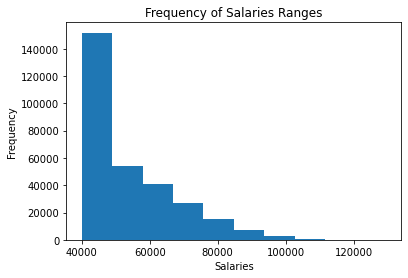

In [7]:
# Plot histogram to visualize the most common salary ranges for employees.
histogram = salaries["salary"]
graph = histogram.plot.hist()
graph.set_title("Frequency of Salaries Ranges")
graph.set_xlabel("Salaries")
plt.show()

In [8]:
# Reading the "employees" table
employees = pd.read_sql("SELECT * FROM \"Employees\"", connection)
employees.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [9]:
# Reading the "employees" table
titles = pd.read_sql("SELECT * FROM \"Titels\"", connection)
titles.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [10]:
# Join salaries, employees and title
emp_salary = employees.merge(salaries, on="emp_no")
merged = emp_salary.merge(titles, left_on="emp_title_id", right_on="title_id")

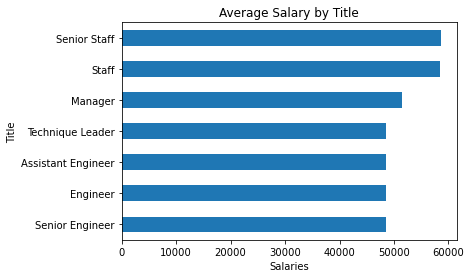

In [11]:
# Plot bar chart to show average salary by title
grouped_data = merged[["title","salary"]].groupby("title").mean()
grouped_data = grouped_data.sort_values(by="salary", ascending=True)
graph = grouped_data.plot.barh(legend=False)
graph.set_title("Average Salary by Title")
graph.set_xlabel("Salaries")
graph.set_ylabel("Title")
plt.show()